# Master Forgery

### Program to extract a high quality image of a signature or signatures from any image on plain white paper. Extracts images with a completely white background, and crops to remove most of the plain paper.

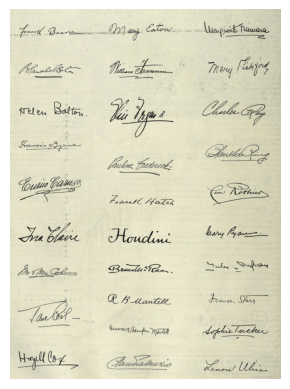

In [2703]:
import cv2 as cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as image
import math

#I = cv2.imread("Boss.png")
I = cv2.imread("signatures.jpg")
#I = cv2.imread("sign5.jpg")

I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
Original = I.copy()

plt.imshow(I)
plt.axis('off')

h, w, d = I.shape
S = cv2.resize(I, dsize=(4*w, 4*h))

(np.float64(-0.5), np.float64(2257.5), np.float64(3081.5), np.float64(-0.5))

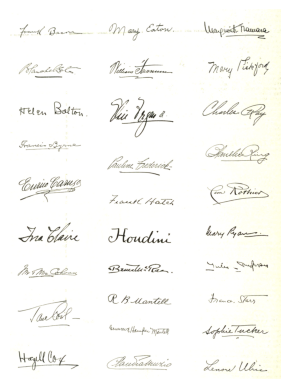

In [2704]:
k = np.array([[14,15,14], [15,16,15], [14,15,14]], dtype=float)/99

smooth = cv2.filter2D(I,ddepth=-1,kernel=k)

plt.imshow(smooth)
plt.axis('off')

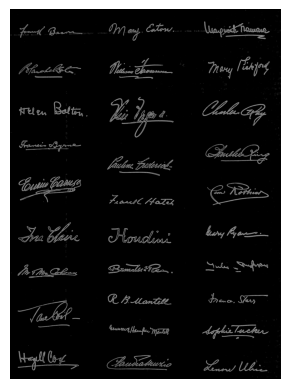

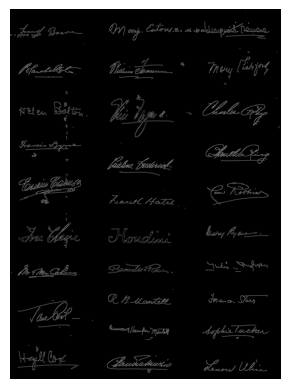

(np.float64(-0.5), np.float64(2257.5), np.float64(3081.5), np.float64(-0.5))

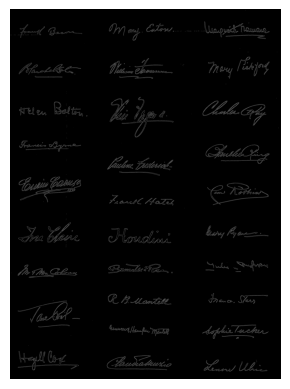

In [2705]:
G = cv2.cvtColor(smooth, cv2.COLOR_RGB2GRAY)

Ix = cv2.Sobel(G,ddepth=cv2.CV_64F,dx=1,dy=0)
Iy = cv2.Sobel(G,ddepth=cv2.CV_64F,dx=0,dy=1)

M = np.sqrt((Ix * Ix) + (Iy * Iy))

E = cv2.Canny(I,threshold1=255,threshold2=0)

plt.imshow(M, cmap="gray")
plt.axis('off')

plt.show()
plt.imshow(E, cmap="gray")
plt.axis('off')

mag_on_edge = cv2.bitwise_and(M, M, mask=E)
plt.show()
plt.imshow(mag_on_edge, cmap="gray")
plt.axis('off')

In [2706]:
"""
calc = (np.mean(mag_on_edge)*0.0015131579) - 0.1238157906

T = np.mean(mag_on_edge) - 0.103*np.std(mag_on_edge)

T, B = cv2.threshold(mag_on_edge, thresh = T, maxval = 255, type = cv2.THRESH_BINARY)

plt.imshow(B, cmap="gray")
plt.axis('off')
"""

'\ncalc = (np.mean(mag_on_edge)*0.0015131579) - 0.1238157906\n\nT = np.mean(mag_on_edge) - 0.103*np.std(mag_on_edge)\n\nT, B = cv2.threshold(mag_on_edge, thresh = T, maxval = 255, type = cv2.THRESH_BINARY)\n\nplt.imshow(B, cmap="gray")\nplt.axis(\'off\')\n'

In [2707]:
right = max(np.where(mag_on_edge > 100)[1])
left = min(np.where(mag_on_edge > 100)[1])
bottom = max(np.where(mag_on_edge > 100)[0])
top = min(np.where(mag_on_edge > 100)[0])

(np.float64(-0.5), np.float64(2239.5), np.float64(3010.5), np.float64(-0.5))

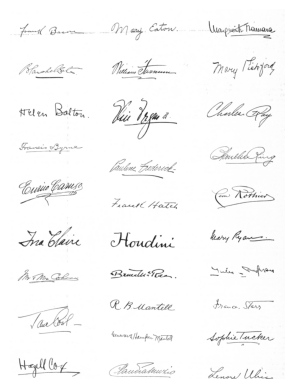

In [2708]:
I = cv2.cvtColor(smooth, cv2.COLOR_RGB2YUV)

V = I[:,:,0]

V = V[top:bottom, left:right]

plt.show()
plt.imshow(V, cmap="gray")
plt.axis('off')

0.25242943402089824
248.64901714546662


(np.float64(-0.5), np.float64(2239.5), np.float64(3010.5), np.float64(-0.5))

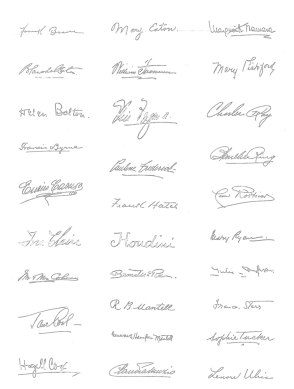

In [2709]:
calc = (np.mean(V)*0.0015131579) - 0.1238157906

print(calc)

offset = calc*(np.std(V))

print(np.mean(V))

B = cv2.adaptiveThreshold(V, maxValue = 255, adaptiveMethod = cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
thresholdType = cv2.THRESH_BINARY, blockSize = 3, C = offset)

B = cv2.cvtColor(B, cv2.COLOR_GRAY2RGB)

plt.imshow(B)
plt.axis('off')

True

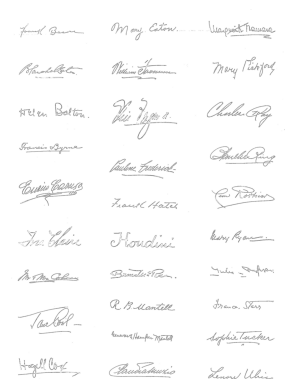

In [2710]:
k = np.array([[3,5,3], [5,6,5], [3,5,3]], dtype=float)/38

smooth = cv2.filter2D(B,ddepth=-1,kernel=k)

plt.imshow(smooth)
plt.axis('off')

cv2.imwrite("extract.png", smooth)